In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler,PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression,Ridge

import copy
import math

In [2]:
df = pd.read_csv('C:/Users/hello/Documents/house/data.csv')
# Convert date to datetime
df['date'] = pd.to_datetime(df['date'])

# Extract features from the date
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

# Drop unnecessary columns 
df.drop(columns=['date', 'street', 'statezip', 'country'], inplace=True)

# Create price per square foot
df['price_per_sqft'] = df['price'] / df['sqft_living']
df['price_per_sqft_above'] = df['price'] / df['sqft_above']

# Calculate age of the house and renovation age
current_year = 2024  
df['age'] = current_year - df['yr_built']
df['renovation_age'] = current_year - df['yr_renovated']

# Create a binary feature for renovation
df['renovated'] = (df['yr_renovated'] > 0).astype(int)
df['basement'] = (df['sqft_basement'] > 0).astype(int)

In [7]:
# One-Hot Encode city
encoder = OneHotEncoder(sparse_output=False)
city_encoded = encoder.fit_transform(df[['city']])


x = pd.concat([df.drop(['city', 'price','yr_renovated','yr_built','sqft_basement','sqft_above','sqft_living'], axis=1), pd.DataFrame(city_encoded)], axis=1)
y = df['price']

# Ensure all column names are strings
x.columns = x.columns.astype(str)


# Split data
x_train, x_, y_train, y_ = train_test_split(x, y, test_size=0.4, random_state=1)
x_test, x_cv, y_test, y_cv = train_test_split(x_, y_, test_size=0.5, random_state=1)
# Reset index of y_train to avoid KeyErrors
y_train = y_train.reset_index(drop=True)
print(f"training data: {x_train.shape}")
print(f"cross validation data: {x_cv.shape}")
print(f"test data: {x_test.shape}")

training data: (2760, 60)
cross validation data: (920, 60)
test data: (920, 60)


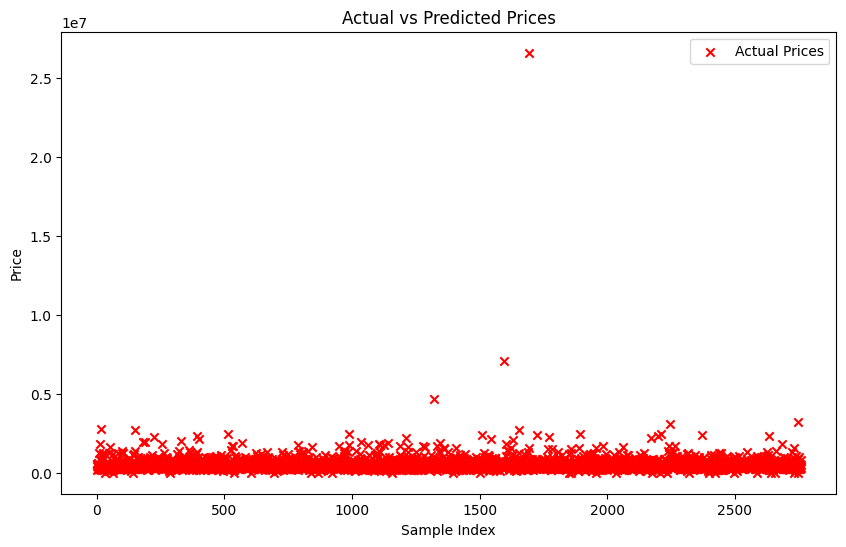

In [5]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_train)), y_train, color='red', marker='x', label='Actual Prices')
plt.legend()
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.title('Actual vs Predicted Prices')
plt.show()

In [8]:
poly = PolynomialFeatures(degree=1)  
X_train_poly = poly.fit_transform(x_train)
X_test_poly = poly.transform(x_cv)
l= LinearRegression()
l.fit(X_train_poly,y_train)
yhat=l.predict(X_train_poly)
cv= l.predict(X_test_poly)

In [9]:
# Calculate for training set metrics
print(f"Training set Mean Absolute Error: {mean_absolute_error(y_train, yhat)}")
print(f"Training set Mean Squared Error: {mean_squared_error(y_train, yhat)}")
print(f"Training set R² Score: {r2_score(y_train, yhat)}")



# Calculate for cross validation set metrics
print(f"Test Mean Absolute Error: {mean_absolute_error(y_cv, cv)}")
print(f"Test Mean Squared Error: {mean_squared_error(y_cv, cv)}")
print(f"Test R² Score: {r2_score(y_cv, cv)}")


Training set Mean Absolute Error: 117440.02728567597
Training set Mean Squared Error: 39147809448.42235
Training set R² Score: 0.8972396450068721
Test Mean Absolute Error: 129741.48728006663
Test Mean Squared Error: 58095665059.72001
Test R² Score: 0.8127866035994051


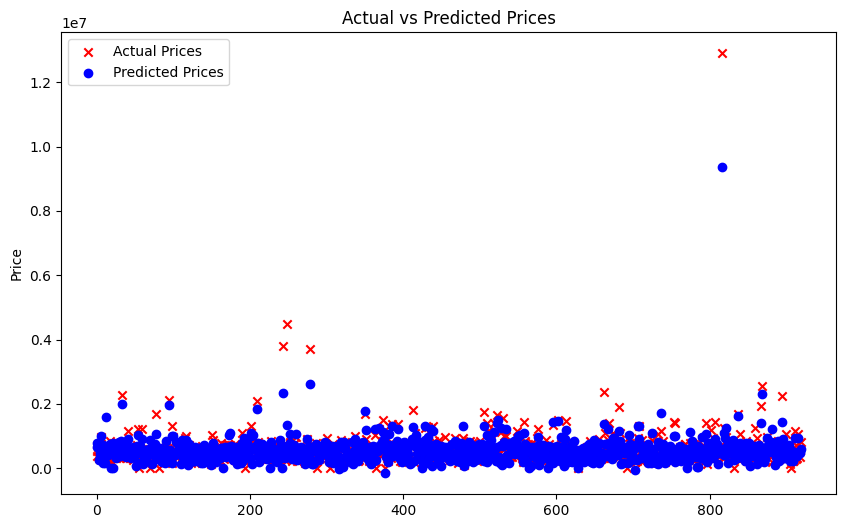

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_cv)), y_cv, color='red', marker='x', label='Actual Prices')
plt.scatter(range(len(cv)), cv, color='blue', marker='o', label='Predicted Prices')
plt.legend()
plt.ylabel('Price')
plt.title('Actual vs Predicted Prices')
plt.show()